### Importing important libraries

In [89]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
#read the data

df = pd.read_csv("train_bf.csv")

## EDA

In [91]:
#Checking the data sample to get an overview of it

df.sample(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
427227,1005778,P00090842,M,36-45,12,C,1,0,11,15.0,NaN,3191
546751,1001238,P00371644,F,36-45,20,A,1,0,20,NaN,NaN,473
422348,1004994,P00030842,M,46-50,17,B,4+,0,1,2.0,15.0,18969
238930,1000881,P00163342,M,18-25,14,A,1,0,6,8.0,NaN,12724
145279,1004388,P00034042,M,46-50,3,B,2,1,1,2.0,16.0,19615
215871,1003367,P00322042,M,51-55,16,A,1,1,5,8.0,NaN,6948
326451,1002203,P00210642,M,46-50,12,B,4+,1,8,14.0,NaN,8006
68337,1004449,P00117442,M,26-35,12,C,4+,1,5,14.0,NaN,8663
89759,1001812,P00227842,F,26-35,12,A,4+,1,2,5.0,NaN,6435
183416,1004292,P00242742,M,26-35,0,C,3,1,1,2.0,9.0,11399


In [92]:
df.shape

(550068, 12)

In [93]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [94]:
#Describing the data

df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [95]:
#Checking the datatypes of attributes of dataset

df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [96]:
#Checking the NULL values present in the dataset

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

<AxesSubplot:>

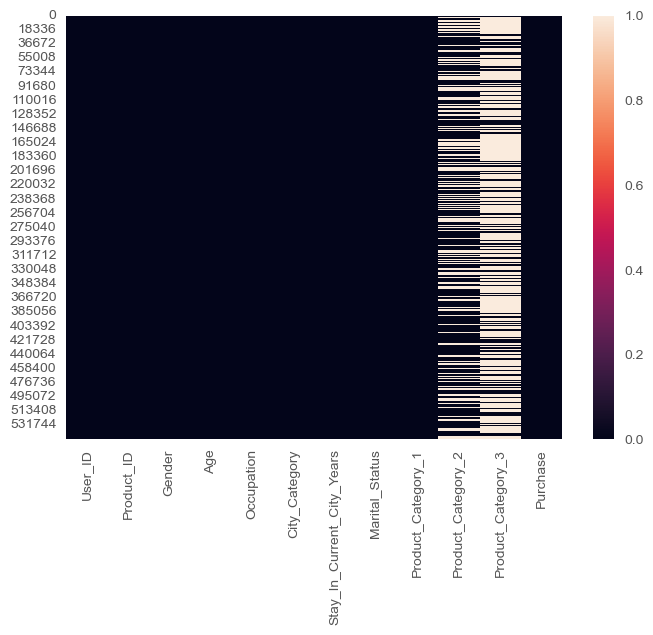

In [97]:
sns.heatmap(df.isnull())

## Visualization of data

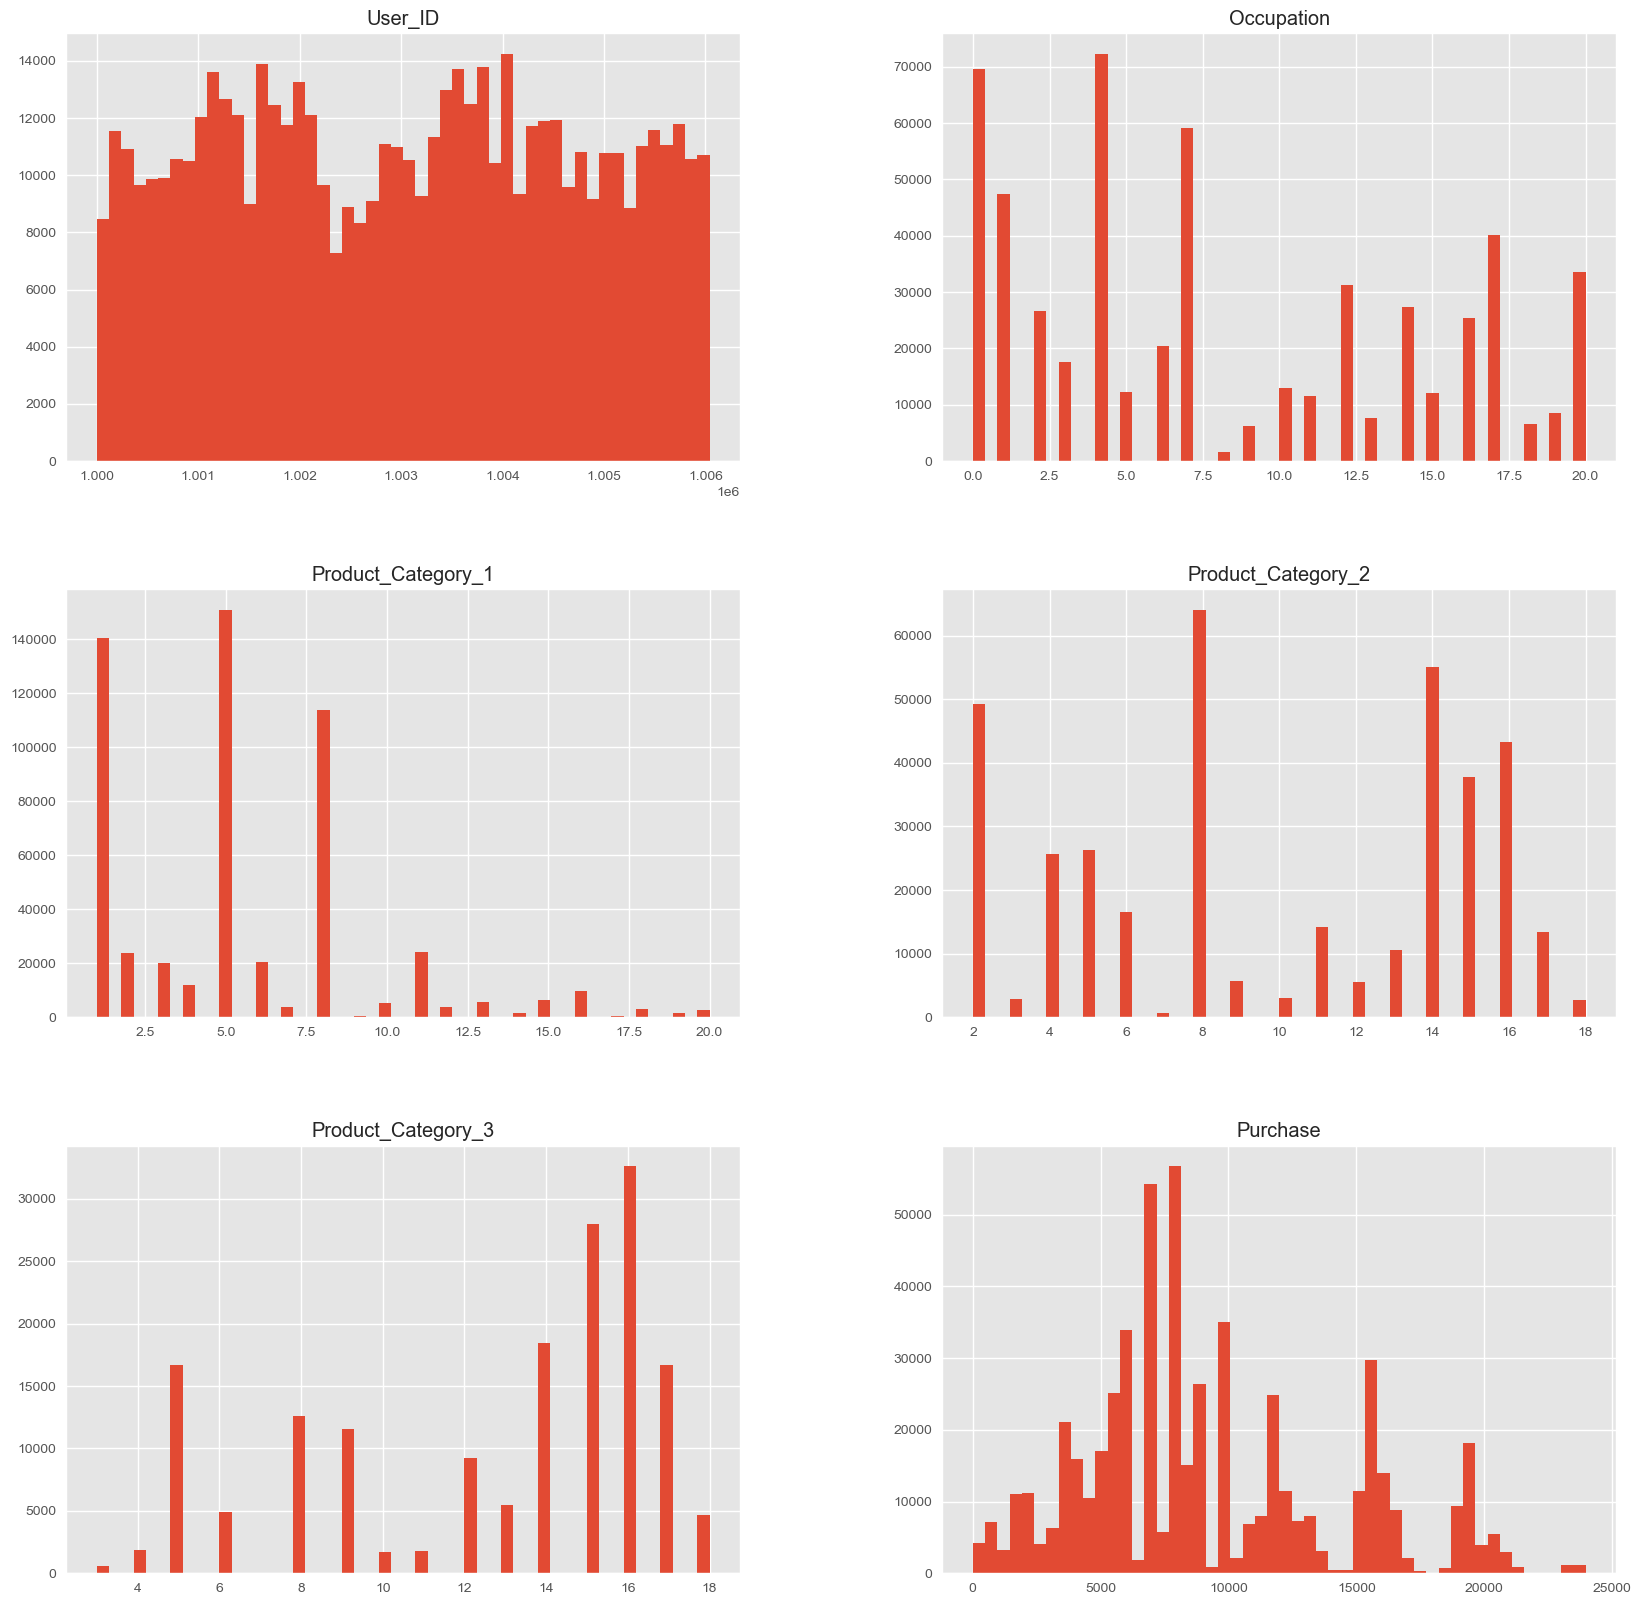

In [98]:
# Checking overall data distribution

df.drop(columns = "Marital_Status").hist(bins = 50 , figsize= (20,20))
plt.show()

In [12]:
#Now getting the gender size to plot the difference between gender

df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

### Pie Chart for understanding the gender gap

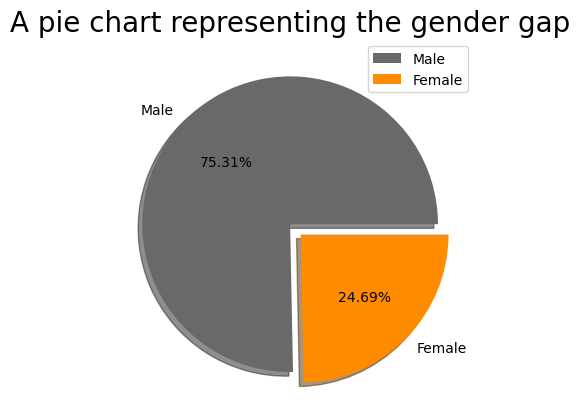

In [13]:

size=[414259,135809]
labels=["Male","Female"]
colors=['dimgray','darkorange']
explode=[0,0.1]

plt.pie(size, labels = labels, colors = colors, shadow = True, explode = explode, autopct = '%.2f%%',startangle=0 )
plt.title("A pie chart representing the gender gap", fontsize= 20)
plt.legend()
plt.show()


In [14]:
#Finding the max purchases in male and female

df.groupby(df['Gender']).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [15]:
# Finding the min purchase in male and female 

df.groupby(df['Gender']).Purchase.min()

Gender
F    12
M    12
Name: Purchase, dtype: int64

In [16]:
# Checking dependency of gender on purchase

df[['Gender','Purchase']].groupby('Gender').Purchase.mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

### Visualizing age of the customers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


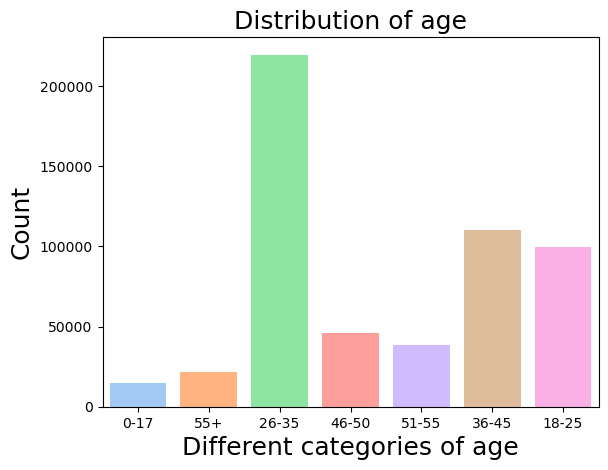

In [17]:

sns.countplot(df['Age'], palette='pastel',saturation=1)
plt.title("Distribution of age",fontsize=18)
plt.xlabel("Different categories of age",fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.show()



In [18]:
# Checking the dependency of age attribute with purchasing power

df[['Age','Purchase']].groupby('Age').mean()

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


### Visualizing occupation of the customers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


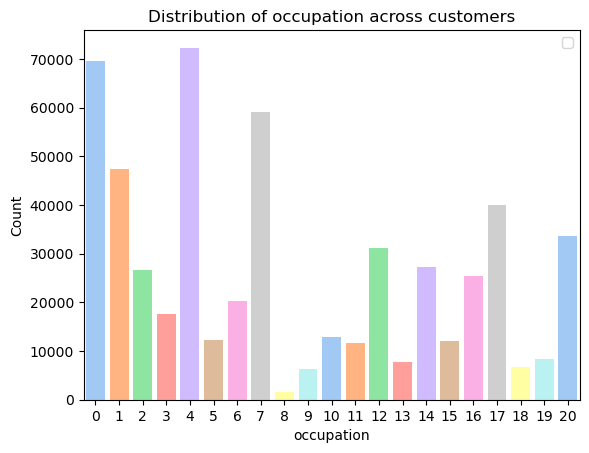

In [19]:

sns.countplot(df['Occupation'],palette='pastel',saturation=1)
plt.title("Distribution of occupation across customers")
plt.xlabel("occupation")
plt.ylabel("Count")
plt.legend()
plt.show()



In [20]:
#Checking dependency of occupation on purchase power

df[['Occupation','Purchase']].groupby('Occupation').mean()

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


### Visualizing the cities of the customers are from


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


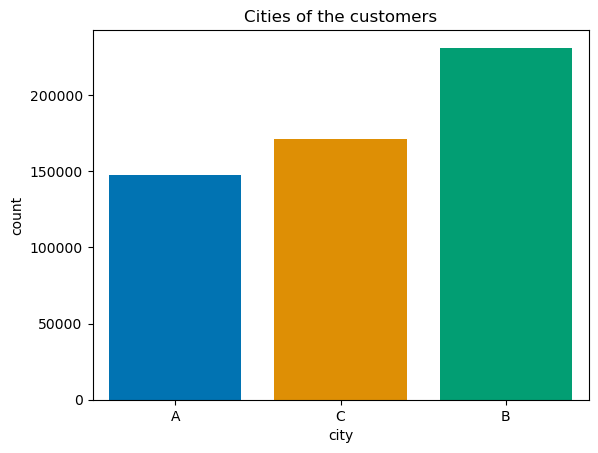

In [21]:

sns.countplot(df['City_Category'],palette='colorblind',saturation=1)
plt.title("Cities of the customers")
plt.xlabel('city')
plt.ylabel('count')
plt.show()

In [22]:
#Checking dependency of cities where customer live with the purchase power

df[['City_Category','Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


In [23]:
# We need to replace 4+ to 5 to visualize stay of customer in city

df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map({'0':0,"1":1,"2":2,"3":3,"4+":5})
df['Stay_In_Current_City_Years'].value_counts()

1    193821
2    101838
3     95285
5     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


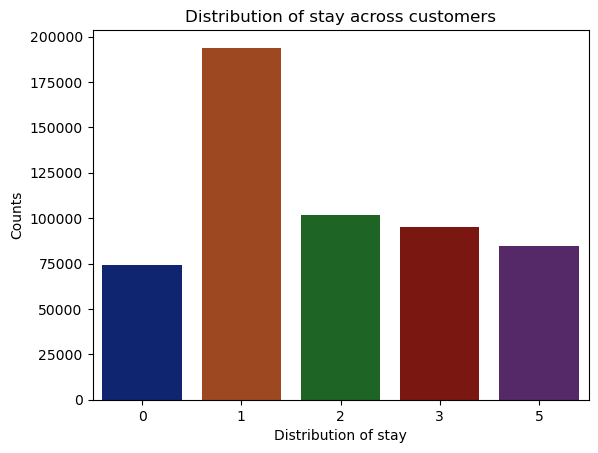

In [24]:
#Visualizing the stay of customers in city

sns.countplot(df['Stay_In_Current_City_Years'],palette='dark')
plt.title("Distribution of stay across customers")
plt.xlabel("Distribution of stay")
plt.ylabel("Counts")
plt.show()

In [25]:
# checking the dependency of stay in purchasing power
df[['Stay_In_Current_City_Years','Purchase']].groupby('Stay_In_Current_City_Years').mean()

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
5,9275.598872


In [27]:
# Checking impact of marital status on purchase
#let's check total number of married and unmarried customers

df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

### Visualizing total purchases made by married and unmarried customers

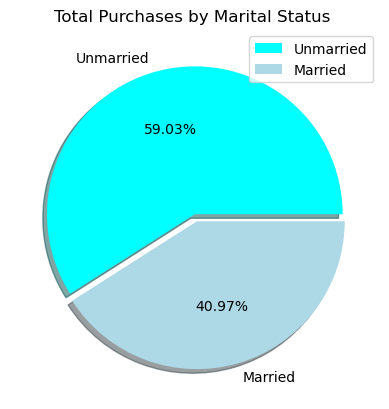

In [28]:

data=[324731,225337]
labels=['Unmarried','Married']
explode=[0,0.05]
colors=['cyan','lightblue']

plt.pie(data, labels=labels, colors=colors, explode=explode, autopct='%0.2f%%',shadow=True)
plt.title("Total Purchases by Marital Status ",fontsize=12)
plt.legend()
plt.show()

In [29]:
#dependency of marital status on purchase power
df.groupby('Marital_Status')['Purchase'].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

### Visualizing -Distribution of different products across customers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


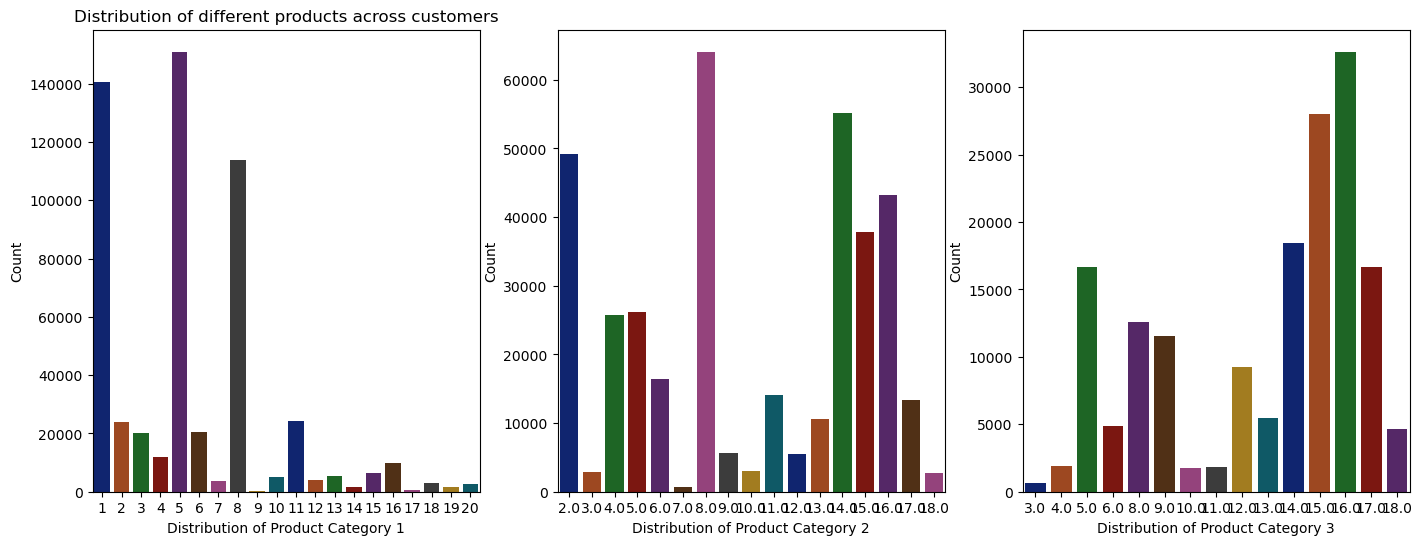

In [30]:

plt.rcParams['figure.figsize'] = (17, 6)

plt.subplot(131)
sns.countplot(df['Product_Category_1'], palette = 'dark')
plt.title('Distribution of different products across customers')
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(df['Product_Category_2'], palette = 'dark')
#plt.title('Distribution of product category 2 across customers')
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(df['Product_Category_3'], palette = 'dark')
#plt.title('Distribution of product category 3 across customers')
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')


plt.show()

In [31]:
#Dependency of product 1 on purchase power
df[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


In [32]:
# checking the dependency of product 2 on purchasing power

df[['Product_Category_2', 'Purchase']].groupby('Product_Category_2').mean()

,Purchase
Product_Category_2,
2.0,13619.356401
3.0,11235.359570
4.0,10215.192001
5.0,9027.821574
6.0,11503.551379
7.0,6884.683706
8.0,10273.259518
9.0,7277.006851
10.0,15648.729543


In [33]:
# checking the dependency of product 3 on purchasing power

df[['Product_Category_3', 'Purchase']].groupby('Product_Category_3').mean()

,Purchase
Product_Category_3,
3.0,13939.696574
4.0,9794.386667
5.0,12117.786889
6.0,13194.311043
8.0,13024.918882
9.0,10431.697210
10.0,13505.813441
11.0,12091.437673
12.0,8715.512762


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


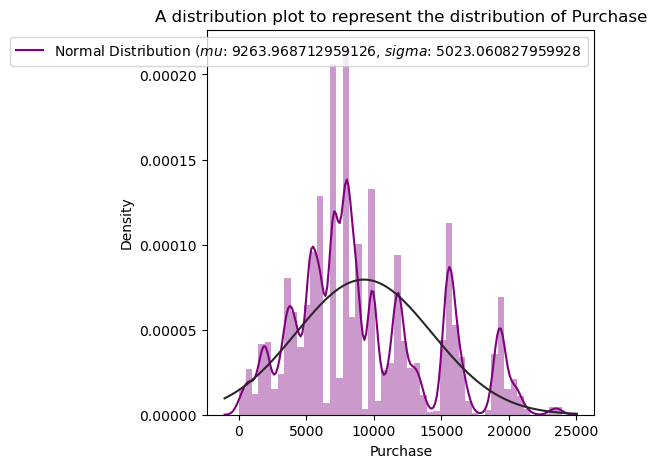

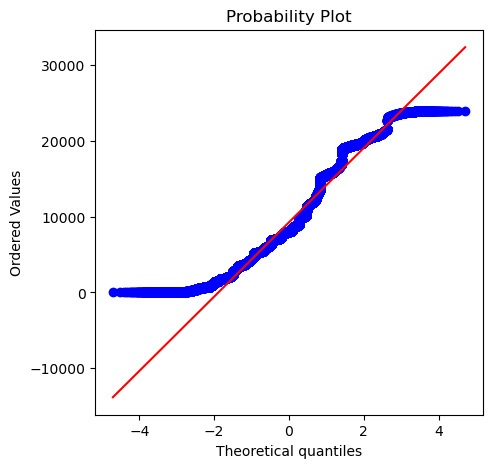

In [34]:
# visualizing the purchase attribute which is our target variable

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable

plt.rcParams['figure.figsize'] = (5, 5)
sns.distplot(df['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(df['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot

stats.probplot(df['Purchase'], plot = plt)
plt.show()

In [35]:
# looking at the columns of the dataset

df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [36]:
# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = df['User_ID']
Product_ID = df['Product_ID']

df = df.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
df.shape

(550068, 10)

In [37]:
# filling the missing values

df['Product_Category_2'].fillna(0, inplace = True)
df['Product_Category_3'].fillna(0, inplace = True)

df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## PreProcessing

In [38]:
# making dummies of variables
# performing one hot encoding


df = pd.get_dummies(df)

# checking the shape of new dataset
df.shape

(550068, 19)

In [39]:
df.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,10,2,0,3,0.0,0.0,8370,1,0,1,0,0,0,0,0,0,1,0,0
1,10,2,0,1,6.0,14.0,15200,1,0,1,0,0,0,0,0,0,1,0,0
2,10,2,0,12,0.0,0.0,1422,1,0,1,0,0,0,0,0,0,1,0,0
3,10,2,0,12,14.0,0.0,1057,1,0,1,0,0,0,0,0,0,1,0,0
4,16,5,0,8,0.0,0.0,7969,0,1,0,0,0,0,0,0,1,0,0,1


### Splitting the dependent and independent features

In [40]:

y = df['Purchase']

# now removing the purchase column from the dataset
x = df.drop(['Purchase'], axis = 1)



# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (550068, 18)
Shape of y:  (550068,)


In [41]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (385047, 18)
Shape of x_test:  (165021, 18)
Shape of y_train:  (385047,)
Shape of y_test:  (165021,)


### Scaling

In [42]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model


In [43]:
df.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,10,2,0,3,0.0,0.0,8370,1,0,1,0,0,0,0,0,0,1,0,0
1,10,2,0,1,6.0,14.0,15200,1,0,1,0,0,0,0,0,0,1,0,0
2,10,2,0,12,0.0,0.0,1422,1,0,1,0,0,0,0,0,0,1,0,0
3,10,2,0,12,14.0,0.0,1057,1,0,1,0,0,0,0,0,0,1,0,0
4,16,5,0,8,0.0,0.0,7969,0,1,0,0,0,0,0,0,1,0,0,1


In [44]:

from pycaret.regression import *

s=setup(df,target= "Purchase", session_id=123)


,Description,Value
0,Session id,123
1,Target,Purchase
2,Target type,Regression
3,Original data shape,"(550068, 19)"
4,Transformed data shape,"(550068, 19)"
5,Transformed train set shape,"(385047, 19)"
6,Transformed test set shape,"(165021, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [45]:
best = compare_models(exclude='et,rf')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,2144.4427,8245303.2394,2871.4497,0.6732,0.3964,0.3591,5.5040
lightgbm,Light Gradient Boosting Machine,2187.6936,8468468.4895,2910.0465,0.6643,0.3972,0.3673,3.9560
gbr,Gradient Boosting Regressor,2263.7818,8907239.0347,2984.4821,0.6470,0.4144,0.3987,63.0850
knn,K Neighbors Regressor,2433.3092,11120012.4361,3334.6452,0.5593,0.4478,0.4483,112.7920
dt,Decision Tree Regressor,2393.3284,11525400.4016,3394.8929,0.5432,0.4185,0.3485,2.9610
ada,AdaBoost Regressor,2981.9029,14504598.8894,3807.4321,0.4250,0.6660,1.5345,26.6270
br,Bayesian Ridge,3530.2039,21376003.0834,4623.4027,0.1528,0.6941,1.1504,1.0460
llar,Lasso Least Angle Regression,3530.0597,21376006.6352,4623.4031,0.1528,0.6941,1.1505,0.6170
ridge,Ridge Regression,3530.2776,21375997.5591,4623.4021,0.1528,0.6941,1.1504,0.7520
lasso,Lasso Regression,3530.0316,21376017.4034,4623.4043,0.1528,0.6941,1.1505,14.4360


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

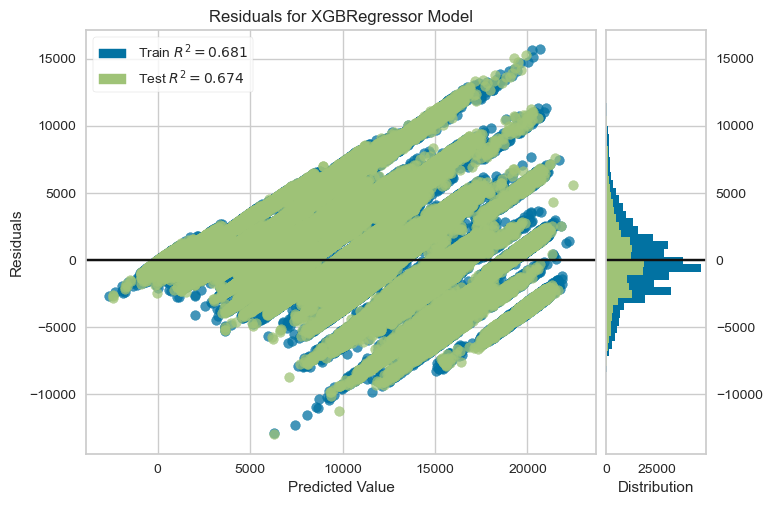

In [47]:
plot_model(best, plot = 'residuals')

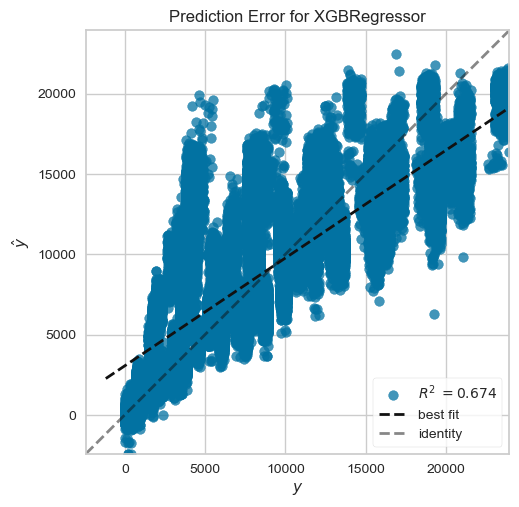

In [48]:
plot_model(best, plot = 'error')

In [49]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,2142.5085,8215122.4987,2866.2035,0.6744,0.3983,0.3613


In [50]:
holdout_pred.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Purchase,prediction_label
427227,12,1,0,11,15.0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,3191,5271.176270
546751,20,1,0,20,0.0,0.0,1,0,0,0,0,1,0,0,0,1,0,0,473,-279.791199
422348,17,5,0,1,2.0,15.0,0,1,0,0,0,0,1,0,0,0,1,0,18969,13316.958984
238930,14,1,0,6,8.0,0.0,0,1,0,1,0,0,0,0,0,1,0,0,12724,15602.660156
145279,3,2,1,1,2.0,16.0,0,1,0,0,0,0,1,0,0,0,1,0,19615,14525.471680


In [51]:
pred_df = pd.DataFrame({"Prediction": holdout_pred['prediction_label'],
                        "Actual": holdout_pred['Purchase']}).reset_index(drop=True)

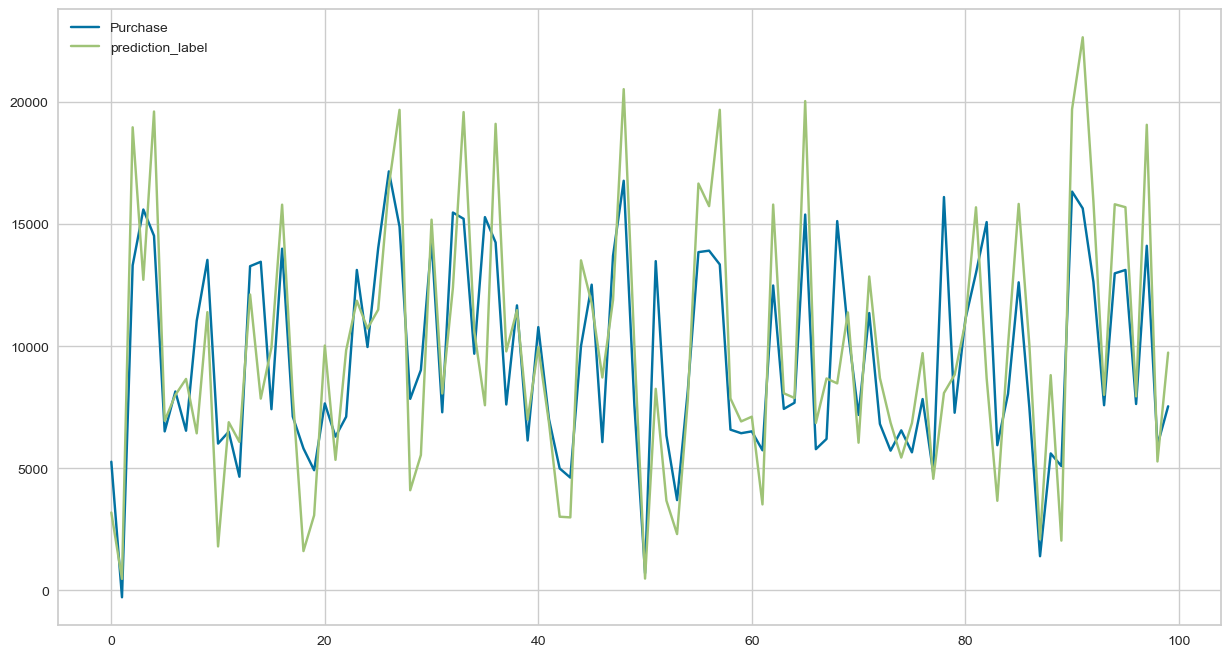

In [52]:
plt.figure(figsize = (15,8))
plt.plot(pred_df[:100])
plt.legend(["Purchase", "prediction_label"])

### XtremeGradientBoosting

In [85]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(max_depth=9, learning_rate= 0.009 ,n_estimators=900)

In [86]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.009, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=900, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
from sklearn.metrics import r2_score
y_pred = xgb_model.predict(x_test)

r2_score(y_test, y_pred)

0.676083669900163

In [65]:
pred_df = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

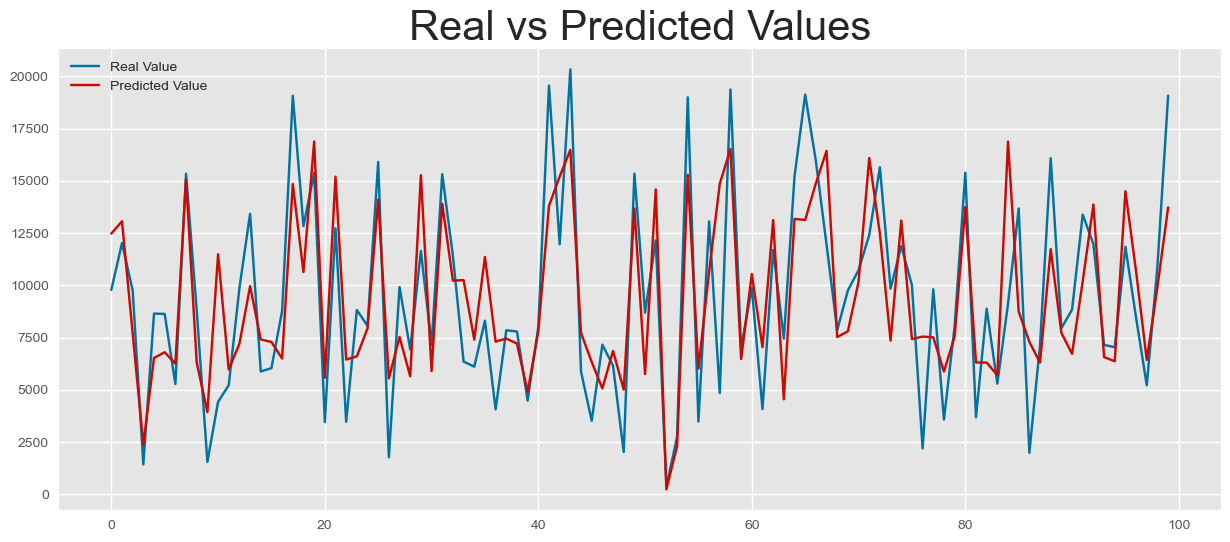

In [66]:
plt.style.use("ggplot")
plt.figure(figsize = (15,6))

plt.plot(pred_df[0:100]['Actual'], color = "b", label = "Real Value")
plt.plot(pred_df[0:100]["Prediction"], color = "r", label = "Predicted Value")
plt.legend()
plt.title("Real vs Predicted Values", fontsize = 30)
plt.show()